CarbonX ML

In [117]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

df = pd.read_csv('data/real_data.csv')


df.head()

,unit_id,basic_ignition_total_duration,basic_ignition_moving_duration,basic_moving_percentage,basic_km,basic_trips,basic_avg_speed,basic_ignition_total_duration_in_sec,basic_ignition_moving_duration_in_sec,basic_fuel_consumed,...,can_fuel_consumed,country_code,vehcile_model,reg_plate,lat,lng,lifetime_odo,last_update,lifetime_engine,created_at
0,439203,4:17:53,2:54:59,0.68,176.81,4,22.50,15473.0,10499.300075,36.61,...,35.00,AE,2013 / Volvo fh,85131 DXB,24.12930,51.61891,58357368,2024-01-17T09:32:27Z,9349674,2023-06-01T07:02:24Z
1,439967,7:15:37,4:59:36,0.69,295.19,11,21.73,26137.0,17976.926429,61.66,...,91.30,AE,2014 Volvo fh,55967 New Dxb,25.40504,56.34671,2227972189,2024-01-17T09:32:18Z,8255827,2023-06-02T08:44:36Z
2,440116,10:38:19,5:33:41,0.52,261.97,12,17.08,38299.0,20021.502916,56.16,...,103.59,AE,2012 Volvo fh,71098 Dxb,24.12096,55.82675,55367275,2024-01-17T09:32:35Z,8921111,2023-06-02T14:46:01Z
3,440385,12:35:3,8:14:3,0.65,442.84,15,26.73,45303.0,29643.465730,93.65,...,118.50,AE,2014 Volvo fh,15168 Dxb,24.80692,56.05867,68972154,2024-01-17T09:24:39Z,9086608,2023-06-03T06:29:37Z
4,441207,7:16:30,4:54:15,0.67,266.21,7,23.57,26190.0,17655.092745,55.71,...,83.10,AE,2014 Volvo fh,99056 Dxb,24.14815,55.83453,70484927,2024-01-17T09:20:35Z,8900197,2023-06-06T11:50:05Z


In [83]:
df = df.drop(['unit_id','basic_ignition_total_duration','basic_ignition_moving_duration','basic_fuel_consumed','country_code','reg_plate','lat','lng','lifetime_odo','last_update','lifetime_engine','created_at','from_timestamp','till_timestamp'], axis=1)

In [84]:
import pandas as pd
import re

# Define the normalization function
def normalize_vehicle_description(vehicle):
    vehicle= str(vehicle)
    pattern = re.compile(r'(\d{4})\s*[/,-]?\s*(\w+)\s*(\w+)\s*(\d+)?', re.IGNORECASE)
    
    match = pattern.match(vehicle)
    if match:
        year, make, model, extra = match.groups()
        normalized = f"{year} {make.capitalize()} {model.upper()}"
        if extra:
            normalized += f" {extra}"
        return normalized.strip()
    else:
        # Handle cases without a year or different format
        parts = vehicle.split(',')
        if len(parts) > 1:
            return parts[1].strip() + " " + parts[0].strip()
        else:
            return vehicle.strip().capitalize()

# Example DataFrame


# Apply the normalization function to the DataFrame column
df['normalized_vehcile_model'] = df['vehcile_model'].apply(normalize_vehicle_description)
df = df.drop(['vehcile_model'], axis=1)



In [85]:
df['km_mismatch'] = (abs(df['basic_km'] - df['can_km']) / df['can_km']) * 100

# Handling non-finite values
df['km_mismatch'] = df['km_mismatch'].replace([np.inf, -np.inf], np.nan)
df['km_mismatch'] = df['km_mismatch'].fillna(0)

# Converting the column to integers
df['km_mismatch'] = df['km_mismatch'].round().astype(int)

In [86]:
df.head()

,basic_moving_percentage,basic_km,basic_trips,basic_avg_speed,basic_ignition_total_duration_in_sec,basic_ignition_moving_duration_in_sec,can_km,can_fuel_consumed,normalized_vehcile_model,km_mismatch
0,0.68,176.81,4,22.50,15473.0,10499.300075,176.50,35.00,2013 Volvo FH,0
1,0.69,295.19,11,21.73,26137.0,17976.926429,302.18,91.30,2014 Volvo FH,2
2,0.52,261.97,12,17.08,38299.0,20021.502916,272.13,103.59,2012 Volvo FH,4
3,0.65,442.84,15,26.73,45303.0,29643.465730,423.38,118.50,2014 Volvo FH,5
4,0.67,266.21,7,23.57,26190.0,17655.092745,256.87,83.10,2014 Volvo FH,4


In [87]:
df.shape

(65164, 10)

In [88]:
filtered_df = df[df['km_mismatch'] < 10]

In [89]:
filtered_df.shape

(63986, 10)

In [90]:
df = df.drop(['can_km','km_mismatch','basic_moving_percentage','basic_avg_speed'], axis=1)

In [91]:
df.head(
)

,basic_km,basic_trips,basic_ignition_total_duration_in_sec,basic_ignition_moving_duration_in_sec,can_fuel_consumed,normalized_vehcile_model
0,176.81,4,15473.0,10499.300075,35.00,2013 Volvo FH
1,295.19,11,26137.0,17976.926429,91.30,2014 Volvo FH
2,261.97,12,38299.0,20021.502916,103.59,2012 Volvo FH
3,442.84,15,45303.0,29643.465730,118.50,2014 Volvo FH
4,266.21,7,26190.0,17655.092745,83.10,2014 Volvo FH


In [92]:
filtered_df = df[(df['can_fuel_consumed'] > 10)& (df['basic_km'] > 10)]

In [93]:
df_no_zeros = filtered_df[(filtered_df != 0).all(axis=1)]

In [94]:
df_no_zeros.describe()

,basic_km,basic_trips,basic_ignition_total_duration_in_sec,basic_ignition_moving_duration_in_sec,can_fuel_consumed
count,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000
mean,314.871209,9.947873,35252.500394,20116.586137,109.776058
std,163.430392,4.954054,15301.299454,9652.896841,63.093721
min,10.790000,1.000000,2.000000,1.000011,10.100000
25%,197.955000,6.000000,24335.000000,12978.167067,62.407500
50%,299.445000,9.000000,34572.500000,19553.934337,106.405000
75%,404.317500,13.000000,45973.500000,26160.879067,150.400000
max,1282.560000,38.000000,82268.000000,66273.147790,419.700000


In [95]:
df_no_zeros.shape

(7616, 6)

In [96]:
# define numerical & categorical columns
numeric_features = [feature for feature in df_no_zeros.columns if df_no_zeros[feature].dtype != 'O']
categorical_features = [feature for feature in df_no_zeros.columns if df_no_zeros[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['basic_km', 'basic_trips', 'basic_ignition_total_duration_in_sec', 'basic_ignition_moving_duration_in_sec', 'can_fuel_consumed']

We have 1 categorical features : ['normalized_vehcile_model']


In [97]:
df_no_zeros.describe()

,basic_km,basic_trips,basic_ignition_total_duration_in_sec,basic_ignition_moving_duration_in_sec,can_fuel_consumed
count,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000
mean,314.871209,9.947873,35252.500394,20116.586137,109.776058
std,163.430392,4.954054,15301.299454,9652.896841,63.093721
min,10.790000,1.000000,2.000000,1.000011,10.100000
25%,197.955000,6.000000,24335.000000,12978.167067,62.407500
50%,299.445000,9.000000,34572.500000,19553.934337,106.405000
75%,404.317500,13.000000,45973.500000,26160.879067,150.400000
max,1282.560000,38.000000,82268.000000,66273.147790,419.700000


In [98]:
df_no_zeros.isna()

,basic_km,basic_trips,basic_ignition_total_duration_in_sec,basic_ignition_moving_duration_in_sec,can_fuel_consumed,normalized_vehcile_model
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
64851,False,False,False,False,False,False
64853,False,False,False,False,False,False
64863,False,False,False,False,False,False
64864,False,False,False,False,False,False


In [99]:
df_no_zeros.dropna()
#df_filtered= df[np.isfinite(df_no_zeros).all(1)]

,basic_km,basic_trips,basic_ignition_total_duration_in_sec,basic_ignition_moving_duration_in_sec,can_fuel_consumed,normalized_vehcile_model
0,176.81,4,15473.0,10499.300075,35.00,2013 Volvo FH
1,295.19,11,26137.0,17976.926429,91.30,2014 Volvo FH
2,261.97,12,38299.0,20021.502916,103.59,2012 Volvo FH
3,442.84,15,45303.0,29643.465730,118.50,2014 Volvo FH
4,266.21,7,26190.0,17655.092745,83.10,2014 Volvo FH
...,...,...,...,...,...,...
64851,146.39,4,20792.0,9140.106727,88.28,2016 Volvo FH
64853,361.71,8,33802.0,24731.950836,153.59,2015 Volvo FH
64863,256.59,21,29656.0,20836.157834,23.20,Toyota rush 2022
64864,220.00,24,27745.0,12270.742488,22.40,Toyota rush 2022


In [100]:
y= df_no_zeros['can_fuel_consumed']
y

0         35.00
1         91.30
2        103.59
3        118.50
4         83.10
          ...  
64851     88.28
64853    153.59
64863     23.20
64864     22.40
64865     21.40
Name: can_fuel_consumed, Length: 7616, dtype: float64

In [101]:
X = df_no_zeros.drop(columns=['can_fuel_consumed'],axis=1)
X.head()

,basic_km,basic_trips,basic_ignition_total_duration_in_sec,basic_ignition_moving_duration_in_sec,normalized_vehcile_model
0,176.81,4,15473.0,10499.300075,2013 Volvo FH
1,295.19,11,26137.0,17976.926429,2014 Volvo FH
2,261.97,12,38299.0,20021.502916,2012 Volvo FH
3,442.84,15,45303.0,29643.465730,2014 Volvo FH
4,266.21,7,26190.0,17655.092745,2014 Volvo FH


In [102]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [103]:
X = preprocessor.fit_transform(X)

In [104]:
X.shape

(7616, 23)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6092, 23), (1524, 23))

In [106]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [118]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
   # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=1000),
    'ElasticNet': ElasticNet(),
}

params={
                "Decision Tree": {
                    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                    # 'splitter':['best','random'],
                    # 'max_features':['sqrt','log2'],
                },
                "Random Forest":{
                    # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                 
                    # 'max_features':['sqrt','log2',None],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Gradient Boosting":{
                    # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                    'learning_rate':[.1,.01,.05,.001],
                    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                    # 'criterion':['squared_error', 'friedman_mse'],
                    # 'max_features':['auto','sqrt','log2'],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Linear Regression":{},
                "XGBRegressor":{
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "CatBoosting Regressor":{
                    'depth': [6,8,10],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'iterations': [30, 50, 100]
                },
                "AdaBoost Regressor":{
                    'learning_rate':[.1,.01,0.5,.001],
                    # 'loss':['linear','square','exponential'],
                    'n_estimators': [8,16,32,64,128,256]
                }
                
            }


model_list = []
r2_list =[]
rmse_list=[]
mae_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    rmse_list.append(model_test_rmse)
    mae_list.append(model_test_mae)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 25.0708
- Mean Absolute Error: 18.2897
- R2 Score: 0.8421
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 25.0007
- Mean Absolute Error: 18.0963
- R2 Score: 0.8428


Lasso
Model performance for Training set
- Root Mean Squared Error: 28.2896
- Mean Absolute Error: 21.0234
- R2 Score: 0.7990
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 28.0783
- Mean Absolute Error: 20.6725
- R2 Score: 0.8017


Ridge
Model performance for Training set
- Root Mean Squared Error: 25.0740
- Mean Absolute Error: 18.2878
- R2 Score: 0.8421
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 25.0038
- Mean Absolute Error: 18.0954
- R2 Score: 0.8427


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 21.1838
- Mean Absolute Error: 14.6431
- R2 Score: 0.8873
---------

In [119]:

pd.DataFrame(list(zip(model_list, r2_list,rmse_list,mae_list)), columns=['Model Name', 'R2_Score','RMSE_Score','MAE_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score,RMSE_Score,MAE_Score
10,MLP Regressor,0.858449,23.721093,16.160408
5,Random Forest Regressor,0.850233,24.399840,16.552958
8,Gradient Boosting,0.848551,24.536462,17.179669
0,Linear Regression,0.842766,25.000667,18.096300
2,Ridge,0.842726,25.003823,18.095393
6,XGBRegressor,0.842571,25.016149,16.996925
3,K-Neighbors Regressor,0.836566,25.488827,17.474848
1,Lasso,0.801671,28.078326,20.672499
9,SVR,0.776506,29.806527,20.109206
7,AdaBoost Regressor,0.728359,32.860634,26.724350


In [120]:

lin_model = MLPRegressor(max_iter=1000)
#lin_model = RandomForestRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.83


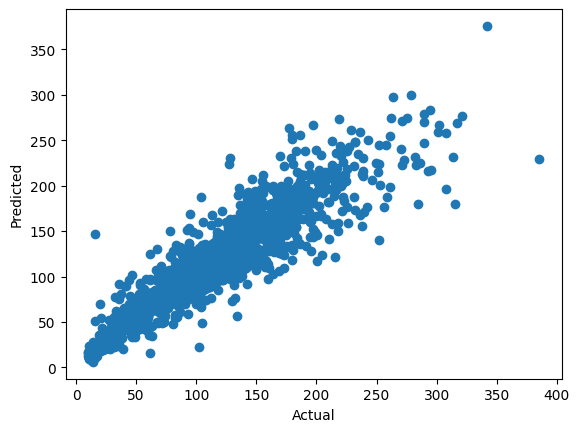

In [121]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

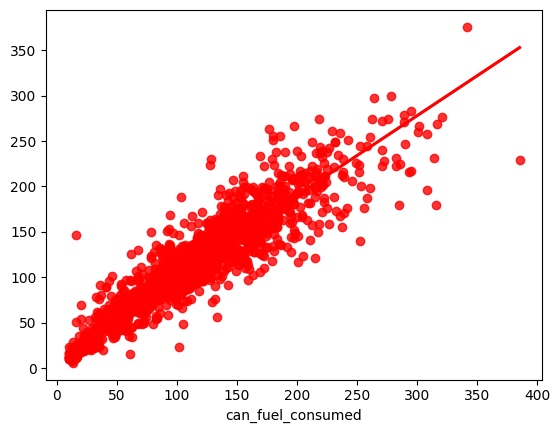

In [122]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [123]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
11689,128.69,142.258213,-13.568213
25216,27.00,31.262632,-4.262632
16618,261.18,254.185071,6.994929
1003,84.30,82.525927,1.774073
12368,44.91,59.035636,-14.125636
...,...,...,...
15626,126.80,153.883876,-27.083876
35453,19.20,20.101982,-0.901982
28648,21.00,20.580175,0.419825
4855,22.09,24.298775,-2.208775


In [134]:
df=pred_df[pred_df['Difference']>50]

In [136]:
df.shape

(47, 3)